## DA_Fall21_HW_1 Due at Mid-night 10/19/2021

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset ##

In [3]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(54, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [4]:
crash.describe()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,54.000000,53.000000,54.000000,54.000000,54.000000,53.000000,54.000000
mean,15.668519,5.028755,5.506778,13.545407,13.931500,908.318113,133.967407
std,4.087386,2.000479,5.157681,4.463259,3.730217,232.237787,24.703393
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.725000,3.774000,3.891000,10.345000,11.262000,768.950000,112.332500
50%,15.450000,4.608000,4.542000,13.816000,13.717000,861.180000,135.840000
75%,18.350000,6.510000,5.622000,16.215000,16.579000,1011.140000,152.065000
max,23.900000,9.450000,40.642000,23.661000,21.280000,2000.030000,194.780000


## Question 1. Check if there are any null or NA

In [5]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium        True
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

In [6]:
crash.dropna(inplace=True)
crash.isnull().any()

accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

<AxesSubplot:>

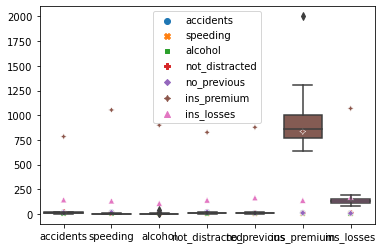

In [7]:
# print(crash.describe())
sns.scatterplot(data=crash)
sns.boxplot(data=crash)

AxesSubplot(0.125,0.125;0.775x0.755)


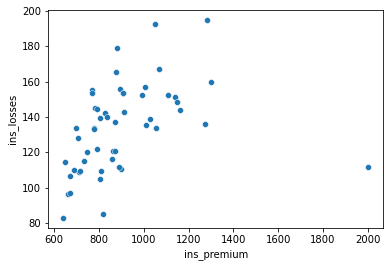

In [8]:
print(sns.scatterplot(x='ins_premium',y='ins_losses',data=crash))

AxesSubplot(0.125,0.125;0.775x0.755)


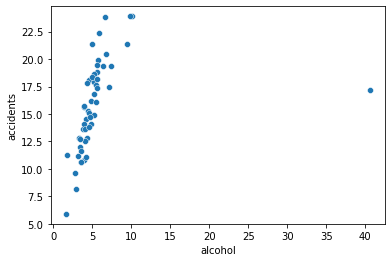

In [9]:
print(sns.scatterplot(x='alcohol',y='accidents',data=crash))

AxesSubplot(0.125,0.125;0.775x0.755)


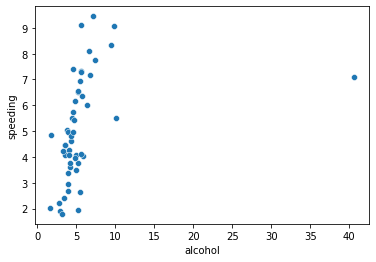

In [10]:
print(sns.scatterplot(x='alcohol',y='speeding',data=crash))

AxesSubplot(0.125,0.125;0.775x0.755)


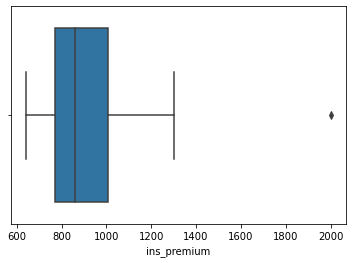

In [11]:
print(sns.boxplot(x='ins_premium',data=crash))

AxesSubplot(0.125,0.125;0.775x0.755)


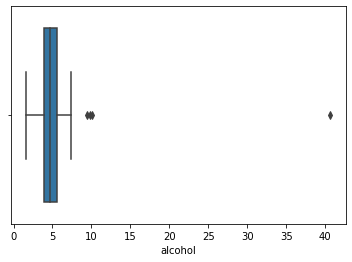

In [12]:
print(sns.boxplot(x='alcohol',data=crash))

In [13]:
## Question 4. Display and Remove (the real) outliers

print(crash.shape)

# find the outliers
print(crash[crash.ins_premium>1800])

(52, 10)
    accidents  speeding  alcohol  not_distracted  no_previous  ins_premium  \
36       10.6     4.452    3.498           8.692        9.116      2000.03   

    ins_losses state region division  
36      111.62    WA   West  Pacific  


In [14]:
# find the outliers
print(crash[crash.alcohol>=35])

    accidents  speeding  alcohol  not_distracted  no_previous  ins_premium  \
40       17.2       7.1   40.642          17.472       16.016       905.99   

    ins_losses state     region   division  
40      153.86    PR  Territory  Territory  


In [15]:
# Remove (the real) outliers
crash = crash[crash.ins_premium<=1800]
print(crash.shape)

(51, 10)


In [16]:
# Remove (the real) outliers
crash=crash[crash.alcohol<40]
print(crash.shape)

(50, 10)


## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [17]:
sql = "select avg(speeding) as average_speeding from crash where region ='Northeast'"
print(ps.sqldf(sql))

   average_speeding
0           4.42475


## Question 6. Calculate the average alcohol for each region using SQL

In [18]:
sql = "select region,avg(alcohol) as average_alcohol from crash group by region"
print(ps.sqldf(sql))

      region  average_alcohol
0    Midwest         4.996917
1  Northeast         3.980500
2      South         5.414647
3       West         4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [19]:
# crash.head(10)
sql = "select division,count(*) as occurrences,avg(speeding) as avg_spe,min(speeding) as min_spe,max(speeding) as max_spe from crash group by division"
print(ps.sqldf(sql))

             division  occurrences   avg_spe  min_spe  max_spe
0  East North Central            5  4.106600    3.384    4.968
1  East South Central            4  4.533250    2.640    7.332
2     Middle Atlantic            2  5.446000    1.792    9.100
3            Mountain            8  5.812250    3.496    8.346
4         New England            6  4.084333    1.886    5.738
5             Pacific            5  5.949400    4.200    9.450
6      South Atlantic            9  5.030444    2.006    9.082
7  West North Central            7  4.293429    1.937    6.923
8  West South Central            4  6.333750    4.032    7.760


## Question 8. Answer Question 7 but use Pandas functions

In [20]:
crash.head(10)
crash.groupby(['division'])['speeding'].agg(['count','mean','min','max'])

,count,mean,min,max
division,,,,
East North Central,5,4.106600,3.384,4.968
East South Central,4,4.533250,2.640,7.332
Middle Atlantic,2,5.446000,1.792,9.100
Mountain,8,5.812250,3.496,8.346
New England,6,4.084333,1.886,5.738
Pacific,5,5.949400,4.200,9.450
South Atlantic,9,5.030444,2.006,9.082
West North Central,7,4.293429,1.937,6.923
West South Central,4,6.333750,4.032,7.760


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

In [21]:
print('-'*40+"accidents"+'-'*40)
a1=crash.groupby(['region'])['accidents'].agg(['std','skew'])
b1=crash.groupby(['region'])['accidents'].apply(pd.DataFrame.kurtosis)
c1=pd.merge(a1,b1,left_index=True,right_index=True)
print(c1.rename(columns={'accidents':'kurtosis'}))

print('-'*40+"speeding"+'-'*40)

a2=crash.groupby(['region'])['speeding'].agg(['std','skew'])
b2=crash.groupby(['region'])['speeding'].apply(pd.DataFrame.kurtosis)
c2=pd.merge(a2,b2,left_index=True,right_index=True)
print(c2.rename(columns={'speeding':'kurtosis'}))

print('-'*40+"alcohol"+'-'*40)

a3=crash.groupby(['region'])['alcohol'].agg(['std','skew'])
b3=crash.groupby(['region'])['alcohol'].apply(pd.DataFrame.kurtosis)
c3=pd.merge(a3,b3,left_index=True,right_index=True)
print(c3.rename(columns={'alcohol':'kurtosis'}))

----------------------------------------accidents----------------------------------------
                std      skew  kurtosis
region                                 
Midwest    3.588988  0.950845  2.067092
Northeast  3.077453  0.777587  0.726713
South      4.537037 -1.125839  1.860064
West       3.325118  0.064819 -1.048692
----------------------------------------speeding----------------------------------------
                std      skew  kurtosis
region                                 
Midwest    1.537451  0.121197 -0.737061
Northeast  2.327773  1.051666  1.763520
South      2.220711  0.172035 -1.327699
West       1.803138  0.697441 -0.465455
----------------------------------------alcohol----------------------------------------
                std      skew  kurtosis
region                                 
Midwest    1.824432  2.093467  5.597372
Northeast  0.872950  0.764250  0.890501
South      1.773576  0.330988  2.125568
West       1.910356  1.159752  2.219220


## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

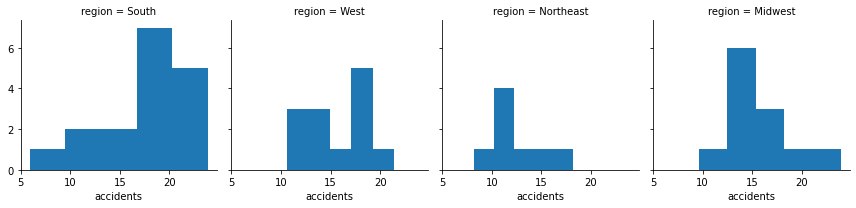

In [22]:
# crash.head()
# crash['accidents'].hist(by=crash['region'],bins=5)
Histogram = sns.FacetGrid(crash, col = 'region')
Histogram = Histogram.map(plt.hist, 'accidents', bins = 5)

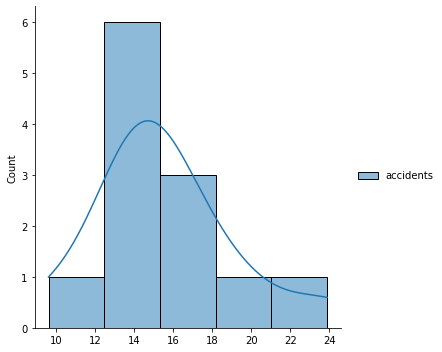

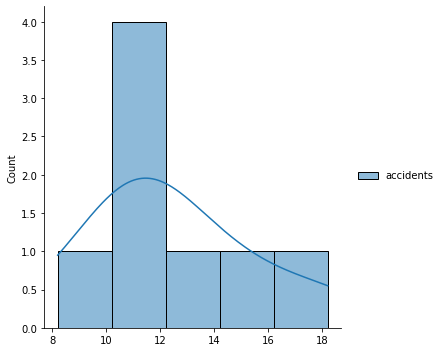

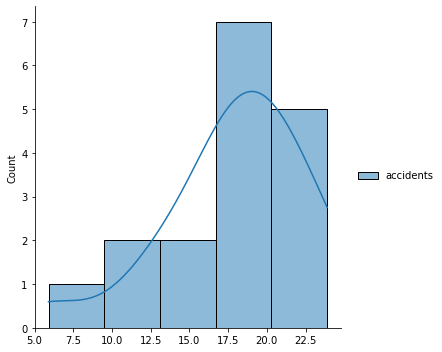

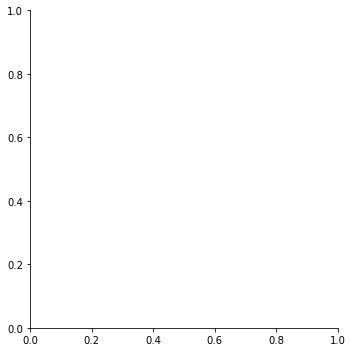

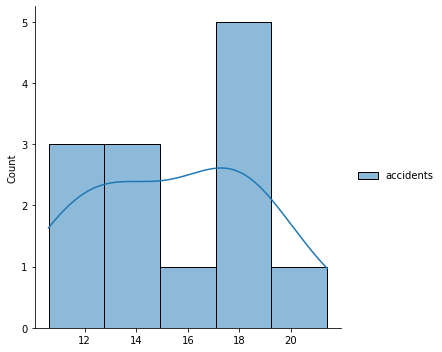

In [23]:
c=crash[['region','accidents']]
c1=c[c.region=='Midwest']
c2=c[c.region=='Northeast']
c3=c[c.region=='South']
c4=c[c.region=='Territory']
c5=c[c.region=='West']
sns.displot(c1,bins=5,kde=True)
sns.displot(c2,bins=5,kde=True)
sns.displot(c3,bins=5,kde=True)
sns.displot(c4,bins=5,kde=True)
sns.displot(c5,bins=5,kde=True)
# c['region'].values


## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

In [24]:
print("For Midwest, accidents distribution has postive skew and postive kurtosis." )
print("\n")
print("For Northeast,accidents distribution has postive skew and postive kurtosis." )
print("\n")
print("For South,accidents distribution has negative skew and postive kurtosis." )
print("\n")
print("For Territory,we cleaned the missing data,and there is no data left,so we can not analyze its distribution." )
print("\n")
print("For West,accidents distribution has postive skew and negative kurtosis." )

For Midwest, accidents distribution has postive skew and postive kurtosis.


For Northeast,accidents distribution has postive skew and postive kurtosis.


For South,accidents distribution has negative skew and postive kurtosis.


For Territory,we cleaned the missing data,and there is no data left,so we can not analyze its distribution.


For West,accidents distribution has postive skew and negative kurtosis.


## Question 12. Calculate correlation of all the factors among themselves and determin which factors among speeding, alcohol or ins_premium will affect accidents the most?

In [25]:
crash.corr()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accidents,1.000000,0.608632,0.850706,0.826209,0.956009,-0.174157,-0.025507
speeding,0.608632,1.000000,0.667377,0.585337,0.568831,-0.059254,-0.059624
alcohol,0.850706,0.667377,1.000000,0.730435,0.780696,-0.146921,-0.103849
not_distracted,0.826209,0.585337,0.730435,1.000000,0.745712,-0.157416,-0.068733
no_previous,0.956009,0.568831,0.780696,0.745712,1.000000,-0.119067,0.007872
ins_premium,-0.174157,-0.059254,-0.146921,-0.157416,-0.119067,1.000000,0.625381
ins_losses,-0.025507,-0.059624,-0.103849,-0.068733,0.007872,0.625381,1.000000


In [26]:
print(crash.corr()['accidents'].loc[['speeding','alcohol','ins_premium']])
print("Alcohol has the highest correlation and therefore will affect the accidents the most")

speeding       0.608632
alcohol        0.850706
ins_premium   -0.174157
Name: accidents, dtype: float64
Alcohol has the highest correlation and therefore will affect the accidents the most


### Now Load a different dataset (MPG dataset number 3)

In [27]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


# Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code to fix the missing values by imputing value from the mean

In [28]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower and weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower and weight


In [29]:
mpg['mpg'] = mpg['mpg'].fillna(mpg['mpg'].mean())
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())
mpg['weight'] = mpg['weight'].fillna(mpg['weight'].mean())
print(mpg.isnull().any())
print(mpg.shape)

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool
(405, 9)
